# Calculating Spectra with Negative Frequencies
Read this only after, you have read __A Straightforward Example for Auto-Correlation Spectra__. 
The whole code would make more sense!

Everything stays the same up to `SpectrumConfig`.

In [1]:
from MultiChSS_SpectrumConfig import SpectrumConfig, DataImportConfig
from MultiChSS_SpectrumCalculator import SpectrumCalculator
from MultiChSS_CrossConfig import CrossConfig
from MultiChSS_PlotConfig import PlotConfig
from MultiChSS_SpectrumPlotter import SpectrumPlotter

import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1=np.load('/Users/armin/sciebo/AG Spektroskopie Projektbox/4Armin/PhDProjects/SignalSnapPaper/long_simulation.npz')
x = data1['x'][0:1000000000]
m = data1['m'][0:1000000000]

In [5]:
config1 = DataImportConfig(data=x)
config2 = DataImportConfig(data=m)
selected_data = [0,1] # because we want to evaluate both arrays. 
                      # If only one was of interest, we could have used selected_data = [0]

## Including Negative Frequencies

### 2nd and 4th order
If you want to include negative frequencies you only need to set `f_min` to something negative!
What you need to know is that now you have to exclude the __3rd order__ from the calculation and evaluate that separately. 
In this case, `s3_calc` is also obsolete!

Everything else stays the same as before!

In [7]:
sconfig = SpectrumConfig(dt=0.001, f_min=-5, f_max=5, s3_calc='1/4',f_unit='MHz', backend='mps', order_in=[1, 2, 4], spectrum_size=1000, 
                         show_first_frame=True)

cconfig = CrossConfig(auto_corr=True)

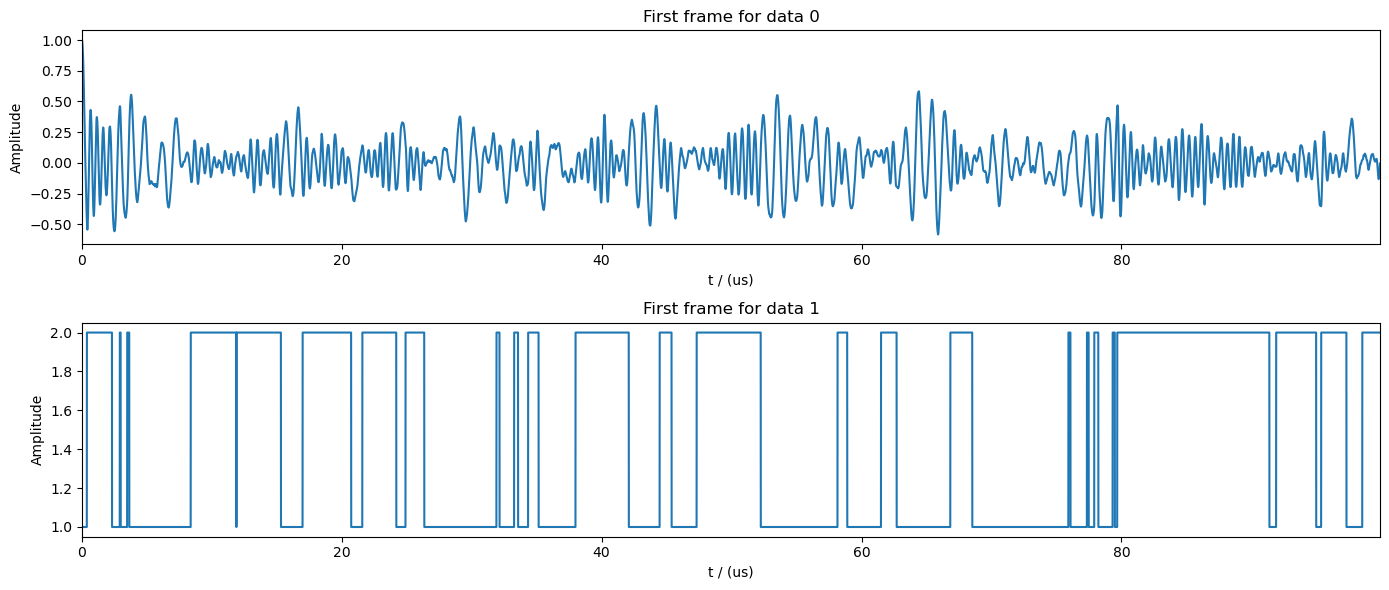

python(26803) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  0%|          | 0/1001 [00:00<?, ?it/s]

In [9]:
scalc = SpectrumCalculator(sconfig, cconfig, [config1, config2], selected=selected_data)
scalc.calc_spec();

+---------------+------------------------+------------------------+
| Dataset Index |           S1           |        Error S1        |
+---------------+------------------------+------------------------+
|      0.0      | -6.594609203602886e-06 | 1.9433717170613818e-05 |
|      1.0      |   1.3334466218948364   | 0.0002925163717009127  |
+---------------+------------------------+------------------------+


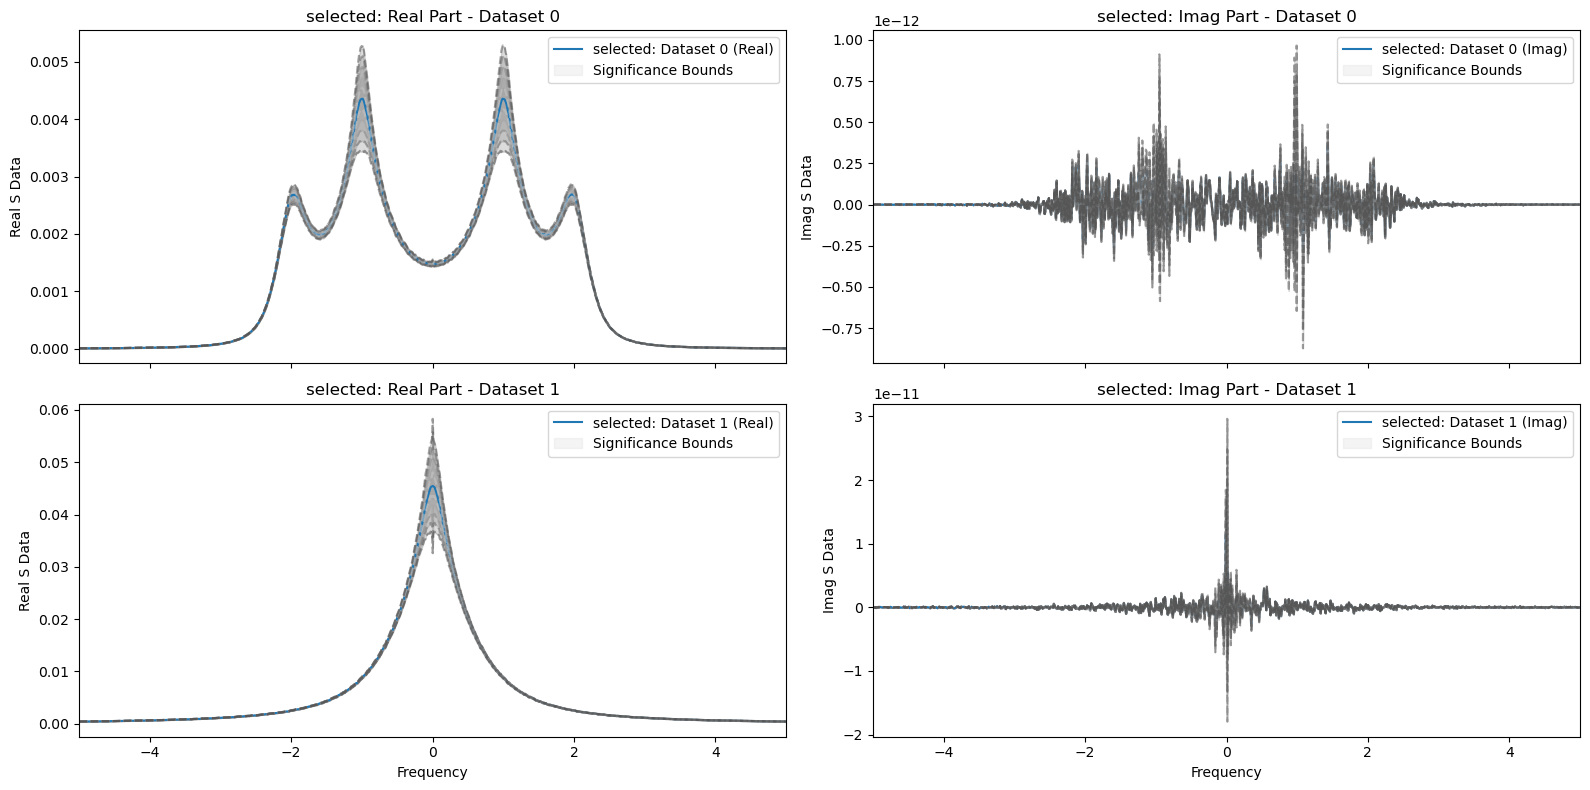


S2 Scaling Information:
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+


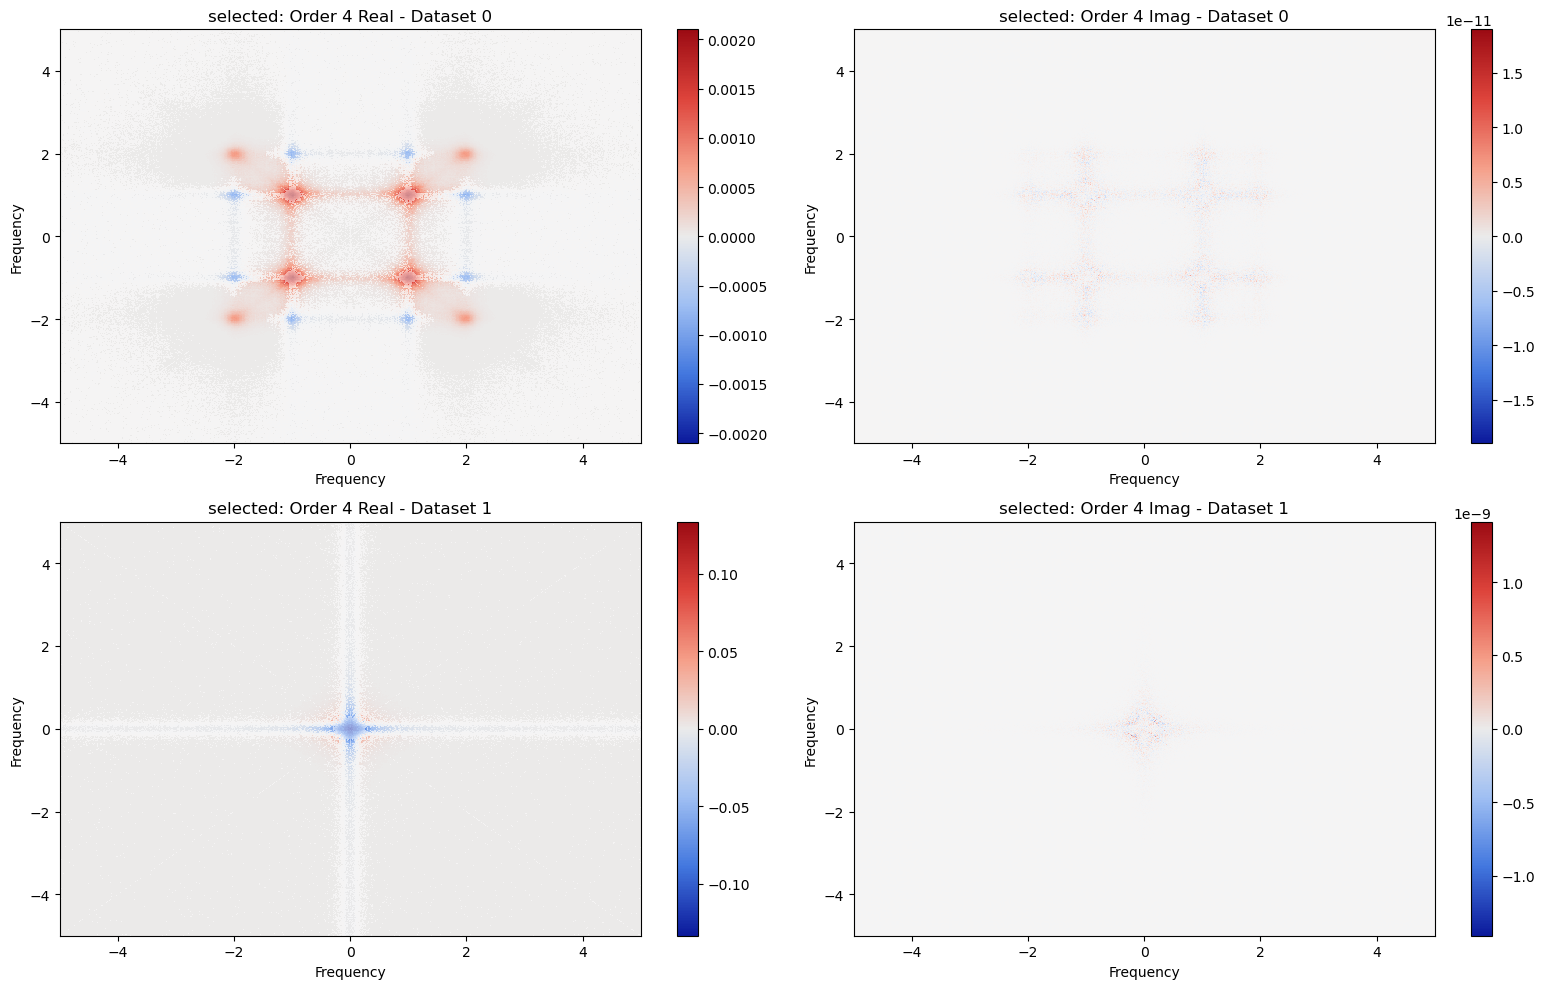


S4 Scaling Information (Normal):
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+
No cross order 4 data available.


In [11]:
pconfig = PlotConfig(f_min=-5, f_max=5, display_orders=[1, 2, 4], significance=5, arcsinh_scale=(True, 0.02),
                     plot_format=['re', 'im'], insignif_transparency=0.5)
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()

### 3rd order

To include negative frequencies for the 3rd order, you have to set `f_min` to 0 and change `s3_calc` to `'1/2'`. And now, you don't need to calculate all the orders again, but the third order only `order_in=[3]`.

In [21]:
sconfig_3neg = SpectrumConfig(dt=0.001, f_min=0, f_max=5, s3_calc='1/2',f_unit='MHz', backend='mps', order_in=[3], spectrum_size=1000, 
                         show_first_frame=False)

In [23]:
scalc_3neg = SpectrumCalculator(sconfig_3neg, cconfig, [config1, config2], selected=selected_data)
scalc_3neg.calc_spec();

  0%|          | 0/500 [00:00<?, ?it/s]

For now the third order spectrum only includes one negative axis which is enough to give you all the information needed due to symmetry of the higher order spectra

No results available for order 1.


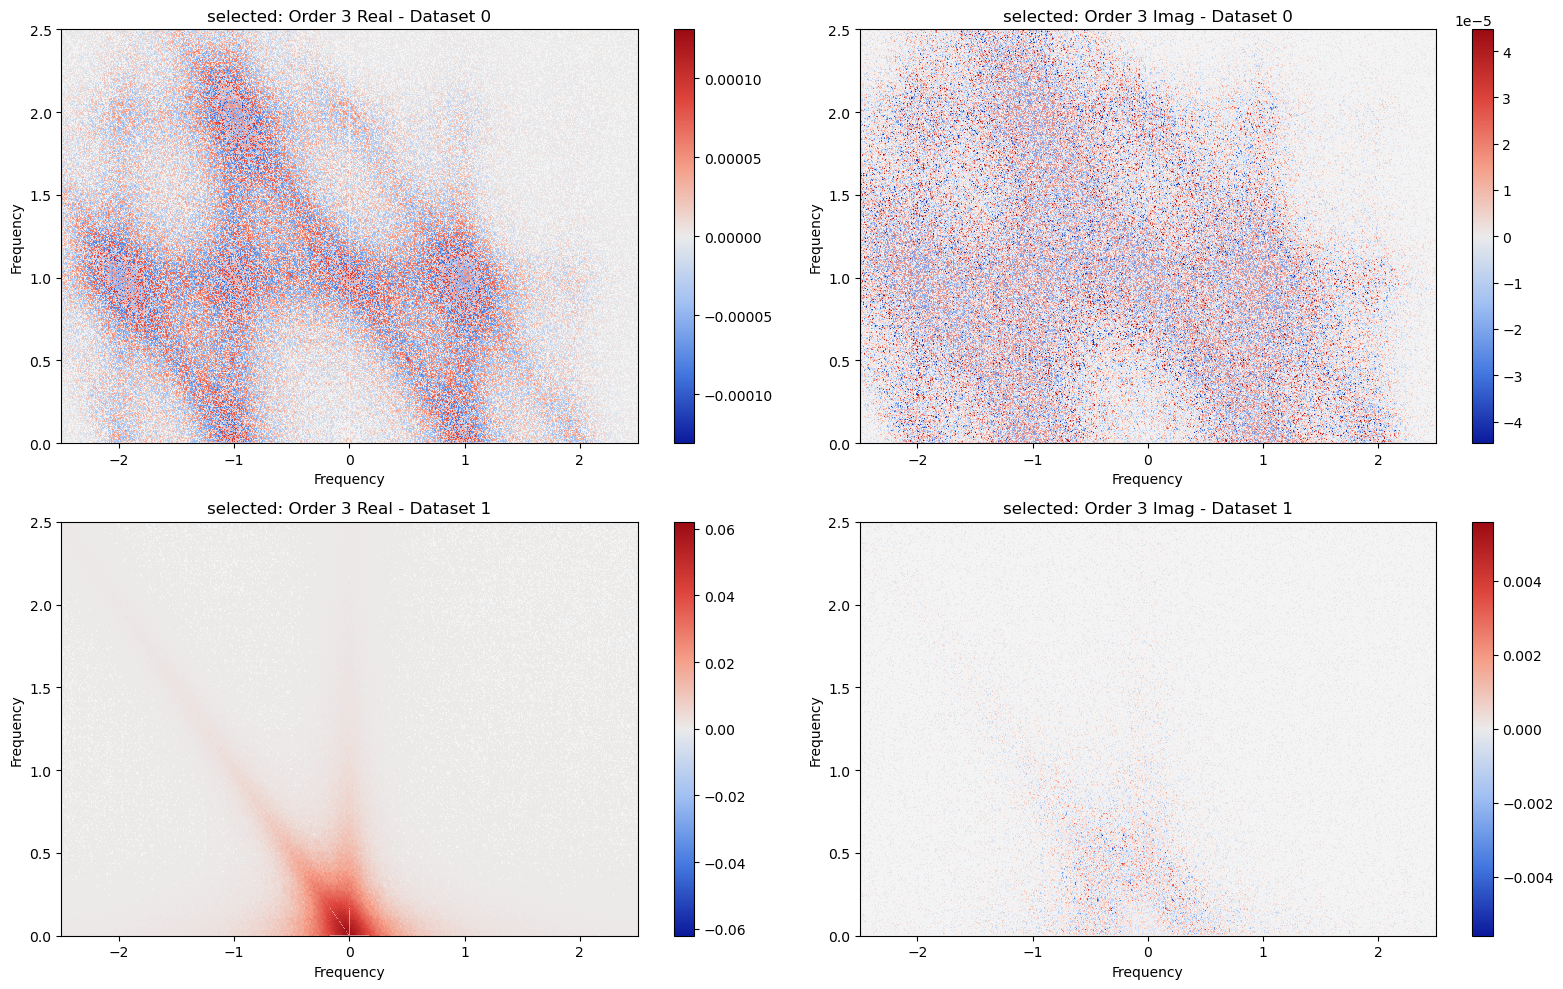


S3 Scaling Information (Normal):
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+
No cross order 3 data available.


In [27]:
pconfig_3neg = PlotConfig(f_min=-5, f_max=5, display_orders=[3], significance=5, arcsinh_scale=(True, 0.02),
                     plot_format=['re', 'im'], insignif_transparency=0.5)
plotter_3neg = SpectrumPlotter(sconfig_3neg, cconfig, scalc_3neg, pconfig_3neg)
plotter_3neg.display()